In [7]:
import numpy as np
import random
from tqdm import tqdm

In [8]:
class Grid:                                                 # Grid Class 정의
    def __init__(self,w,h,x_start,y_start,x_goal,y_goal):   # Grid의 가로, 세로, 시작 좌표와 목표 좌표를 parameter로 받음
        self.x_start = x_start
        self.y_start = y_start
        self.w = w
        self.h = h

        self.grid = np.zeros((h,w))             # h*w
        self.state = (x_start,y_start)          # 지금 위치를 시작 좌표로 설정
        self.goal_state = (x_goal,y_goal)       # 목표 좌표 설정
        self.grid[self.goal_state] = 100        # 목표 좌표의 Reward를 100으로 설정
        self.actions = ['up','down','left','right'] # Agent의 행동들

    def reset(self):                                # Grid reset
        self.state = (self.x_start,self.y_start)    # 지금 위치를 시작 좌표로 설정
        return self.state                           # 지금 위치를 반환

    def step(self,action):          # Agent의 행동 정의
        x,y = self.state            # 지금 위치를 x,y에 할당
        if action == 'up':
            x = max(0,x-1)          # 위로 이동, x 좌표가 1 감소, Grid를 벗어나면 이동하지 않음
        elif action == 'down':
            x = min(self.h-1,x+1)   # 아래로 이동, x 좌표가 1 증가, Grid를 벗어나면 이동하지 않음
        elif action == 'left':
            y = max(0,y-1)          # 왼쪽으로 이동, y 좌표가 1 감소, Grid를 벗어나면 이동하지 않음
        else:
            y = min(self.w-1,y+1)   # 오른쪽으로 이동, y 좌표가 1 증가, Grid를 벗어나면 이동하지 않음

        self.state = (x,y)                  # 이동할 위치 저장(아직 이동하지 않았음)
        reward = self.grid[self.state]      # Reward는 Grid에서 이동할 위치의 값
        done = self.state == self.goal_state    # 이동할 위치와 목표 좌표가 같으면 True를, 아니면 False를 done에 할당
        return self.state, reward, done     # 이동할 위치, 보상, 종료 여부 반환



In [9]:
class QLearningAgent:                                           # Q Learning을 진행할 Agent class 선언
    def __init__(self, grid_world,w,h, alpha, gamma, epsilon):  # Grid, Grid의 가로, 세로, alpha, gamma, epsilon parameter를 parameter로 받음
        self.grid_world = grid_world
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.w = w
        self.h = h
        self.q_table = np.zeros((h,w,len(self.grid_world.actions))) # Grid와 같은 크기 Actions의 개수 만큼의 좌표를 가지는 차원 추가

    def choose_action(self, state):                         # Action 선택 함수, 위치를 입력 받음
        if random.uniform(0,1) < self.epsilon:              # eplison 값보다 작으면
            return random.choice(self.grid_world.actions)   # Action을 무작위로 선택
        else:                                                   # 그렇지 않으면
            state_q_values = self.q_table[state[0],state[1]]    # 주어진 좌표에서 Action에 따른 Q-Value를 가져와서
            return self.grid_world.actions[np.argmax(state_q_values)]   # 그 중 가장 Q-Value를 가지는 Action을 선택

    def update_q_value(self, state, action, reward, next_state):            # Q-Value(Q-Table) 업데이트 함수, 위치, Action, 보상, 다음 위치를 입력받음
        action_index = self.grid_world.actions.index(action)                # Action의 Actions 목록에서의 Index 반환
        best_next_action = np.argmax(self.q_table[next_state[0],next_state[1]]) # 다음 위치에서 가장 Q-Value가 큰 Action을 구함
        td_target = reward + self.gamma * self.q_table[next_state[0],next_state[1],best_next_action] # Temporal Difference
                                                                            # 현재 위치의 보상과 다음 위치에서 가장 큰 Q-Value에 gamma를 곱한 값을 더함
        td_error = td_target - self.q_table[state[0],state[1],action_index] # 그 값과 현재 위치에서 현재 Action의 Q-Value를 뺌
        self.q_table[state[0],state[1],action_index] += self.alpha * td_error # 현재 위치에서 현재 Action의 Q-Value와 위 값에 alpha를 곱한 값을 더함

    def train(self,episodes):               # 학습 함수 선언, 반복 수 입력 받음
        for _ in tqdm(range(episodes),desc="Training Episodes"):    # 진행도 시각화를 위한 tqdm method 사용
            state = self.grid_world.reset()                         # Grid에서 시작 위치 초기화
            done = False                                            # 종료 여부를 '아니오'로
            while not done:                                         # 종료될 때까지
                action = self.choose_action(state)                  # 현재 위치에서 현재 Action 선택
                next_state,reward,done = self.grid_world.step(action)   # Action에 따른 이동할 위치, 보상, 종료 여부 계산
                self.update_q_value(state,action,reward,next_state)     # 현재 위치와 Action, 보상, 이동할 위치를 이용해 Q-Value(Q-Table) Update
                state = next_state                                  # 위치 이동

    def get_q_table(self):
        return self.q_table     # Q-Table 반환

# 다음 위치에서 Q-Value 가장 큰 Action 여러개면 랜덤 선택하도록 변경해야함 np.argmax
# grid에 목적지 여러개 고민: 보상을 여러개 줄지, 목적지 하나씩 Q-table을 만들고 합칠지?

# grid로 좌표a에서 좌표b로 이동 가능 여부 map 그리기 (좌표 * 좌표) matrix
#



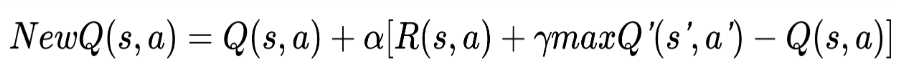

In [10]:
w = 5
h = 5

alpha = 0.9
gamma = 0.75
epsilon = 0.25

grid_world = Grid(w,h,0,0,4,4)
agent = QLearningAgent(grid_world,w,h,alpha, gamma, epsilon)

In [11]:
agent.get_q_table()
# grid_world.actions

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [12]:
agent.train(100000)
print()
Q_table = agent.get_q_table()

Training Episodes: 100%|██████████| 100000/100000 [00:13<00:00, 7389.24it/s]

In [16]:
# Q_table은 (가로,세로,행동)의 차원임
# table을 확인하기에 직관적이지 않음
# (행동, 가로, 세로) 차원으로 Convert

Q_table_actions = []
for i in range(4):
    action_table = []
    for j in range(h):
        row = []
        for k in range(w):
            q_value = round(Q_table[j][k][i],2)
            row.append(q_value)
        action_table.append(row)
    Q_table_actions.append(action_table)




In [18]:
Q_table_actions

[[[10.01, 13.35, 17.8, 23.73, 31.64],
  [10.01, 13.35, 17.8, 23.73, 31.64],
  [13.35, 17.8, 23.73, 31.64, 42.19],
  [17.8, 23.73, 31.64, 42.19, 56.25],
  [23.73, 31.64, 42.19, 56.25, 0.0]],
 [[13.35, 17.8, 23.73, 31.64, 42.19],
  [17.8, 23.73, 31.64, 42.19, 56.25],
  [23.73, 31.64, 42.19, 56.25, 75.0],
  [31.64, 42.19, 56.25, 75.0, 100.0],
  [31.64, 42.19, 56.25, 75.0, 0.0]],
 [[10.01, 10.01, 13.35, 17.8, 23.73],
  [13.35, 13.35, 17.8, 23.73, 31.64],
  [17.8, 17.8, 23.73, 31.64, 42.19],
  [23.73, 23.73, 31.64, 42.19, 56.25],
  [31.64, 31.64, 42.19, 56.25, 0.0]],
 [[13.35, 17.8, 23.73, 31.64, 31.64],
  [17.8, 23.73, 31.64, 42.19, 42.19],
  [23.73, 31.64, 42.19, 56.25, 56.25],
  [31.64, 42.19, 56.25, 75.0, 75.0],
  [42.19, 56.25, 75.0, 100.0, 0.0]]]

In [15]:
Q_table

array([[[ 10.0112915 ,  13.34838867,  10.0112915 ,  13.34838867],
        [ 13.34838867,  17.79785156,  10.0112915 ,  17.79785156],
        [ 17.79785156,  23.73046875,  13.34838867,  23.73046875],
        [ 23.73046875,  31.640625  ,  17.79785156,  31.640625  ],
        [ 31.640625  ,  42.1875    ,  23.73046875,  31.640625  ]],

       [[ 10.0112915 ,  17.79785156,  13.34838867,  17.79785156],
        [ 13.34838867,  23.73046875,  13.34838867,  23.73046875],
        [ 17.79785156,  31.640625  ,  17.79785156,  31.640625  ],
        [ 23.73046875,  42.1875    ,  23.73046875,  42.1875    ],
        [ 31.640625  ,  56.25      ,  31.640625  ,  42.1875    ]],

       [[ 13.34838867,  23.73046875,  17.79785156,  23.73046875],
        [ 17.79785156,  31.640625  ,  17.79785156,  31.640625  ],
        [ 23.73046875,  42.1875    ,  23.73046875,  42.1875    ],
        [ 31.640625  ,  56.25      ,  31.640625  ,  56.25      ],
        [ 42.1875    ,  75.        ,  42.1875    ,  56.25      ]],

    

In [21]:
import matplotlib.pyplot as plt
import pygame

pygame 2.5.2 (SDL 2.28.2, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


<ipython-input-20-c29ba448105a>:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color=color, edgecolor='black'))


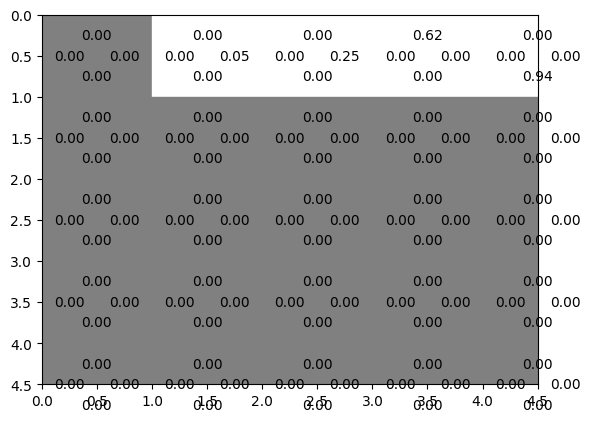

In [20]:
# Visualization Try 1

def plot_q_values(q_values):
    fig, ax = plt.subplots()
    ax.set_xticks(np.arange(len(q_values[0])) + 0.5, minor=True)
    ax.set_yticks(np.arange(len(q_values)) + 0.5, minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
    ax.tick_params(which="minor", size=0)

    # 색상과 값을 각 셀에 플로팅
    for i in range(len(q_values)):
        for j in range(len(q_values[i])):
            cell = q_values[i][j]
            if np.all(cell == 0):
                color = "gray"
            else:
                color = "white"
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=True, color=color, edgecolor='black'))
            ax.text(j + 0.5, i + 0.75, f'{cell[0]:.2f}', ha='center', va='center', color='black')
            ax.text(j + 0.75, i + 0.5, f'{cell[1]:.2f}', ha='center', va='center', color='black')
            ax.text(j + 0.5, i + 0.25, f'{cell[2]:.2f}', ha='center', va='center', color='black')
            ax.text(j + 0.25, i + 0.5, f'{cell[3]:.2f}', ha='center', va='center', color='black')

    plt.gca().invert_yaxis()
    plt.show()

# Q-values 예제 데이터 (5x5 그리드, 각 셀마다 4개의 행동에 대한 Q-value)
q_values = np.array([
    [[0.00, 0.00, 0.00, 0.00], [0.00, 0.05, 0.00, 0.00], [0.00, 0.25, 0.00, 0.00], [0.00, 0.00, 0.62, 0.00], [0.94, 0.00, 0.00, 0.00]],
    [[0.00, 0.00, 0.00, 0.00], [0.00, 0.00, 0.00, 0.00], [0.00, 0.00, 0.00, 0.00], [0.00, 0.00, 0.00, 0.00], [0.00, 0.00, 0.00, 0.00]],
    [[0.00, 0.00, 0.00, 0.00], [0.00, 0.00, 0.00, 0.00], [0.00, 0.00, 0.00, 0.00], [0.00, 0.00, 0.00, 0.00], [0.00, 0.00, 0.00, 0.00]],
    [[0.00, 0.00, 0.00, 0.00], [0.00, 0.00, 0.00, 0.00], [0.00, 0.00, 0.00, 0.00], [0.00, 0.00, 0.00, 0.00], [0.00, 0.00, 0.00, 0.00]],
    [[0.00, 0.00, 0.00, 0.00], [0.00, 0.00, 0.00, 0.00], [0.00, 0.00, 0.00, 0.00], [0.00, 0.00, 0.00, 0.00], [0.00, 0.00, 0.00, 0.00]],
])

plot_q_values(q_values)

In [ ]:
# Visualization Try 2

# 초기 설정
pygame.init()
width, height = 600, 600
rows, cols = 5, 5
cell_size = width // cols
screen = pygame.display.set_mode((width, height))
font = pygame.font.SysFont(None, 24)
pygame.display.set_caption('Q-values Visualization')

# Q-values 예제 데이터 (5x5 그리드, 각 셀마다 4개의 행동에 대한 Q-value)
q_values = np.array([
    [[0.00, 0.00, 0.00, 0.00], [0.00, 0.05, 0.00, 0.00], [0.00, 0.25, 0.00, 0.00], [0.00, 0.00, 0.62, 0.00], [0.94, 0.00, 0.00, 0.00]],
    [[0.00, 0.00, 0.00, 0.00], [0.00, 0.00, 0.00, 0.00], [0.00, 0.00, 0.00, 0.00], [0.00, 0.00, 0.00, 0.00], [0.00, 0.00, 0.00, 0.00]],
    [[0.00, 0.00, 0.00, 0.00], [0.00, 0.00, 0.00, 0.00], [0.00, 0.00, 0.00, 0.00], [0.00, 0.00, 0.00, 0.00], [0.00, 0.00, 0.00, 0.00]],
    [[0.00, 0.00, 0.00, 0.00], [0.00, 0.00, 0.00, 0.00], [0.00, 0.00, 0.00, 0.00], [0.00, 0.00, 0.00, 0.00], [0.00, 0.00, 0.00, 0.00]],
    [[0.00, 0.00, 0.00, 0.00], [0.00, 0.00, 0.00, 0.00], [0.00, 0.00, 0.00, 0.00], [0.00, 0.00, 0.00, 0.00], [0.00, 0.00, 0.00, 0.00]],
])

def draw_q_values():
    for i in range(rows):
        for j in range(cols):
            cell = q_values[i][j]
            x, y = j * cell_size, i * cell_size
            pygame.draw.rect(screen, (255, 255, 255), (x, y, cell_size, cell_size), 1)
            pygame.draw.line(screen, (0, 0, 0), (x, y), (x + cell_size, y + cell_size))
            pygame.draw.line(screen, (0, 0, 0), (x + cell_size, y), (x, y + cell_size))

            # 행동 Q-values 그리기 (위, 오른쪽, 아래, 왼쪽)
            if cell[0] != 0:
                text = font.render(f'{cell[0]:.2f}', True, (0, 0, 0))
                screen.blit(text, (x + cell_size // 2 - text.get_width() // 2, y + 5))
            if cell[1] != 0:
                text = font.render(f'{cell[1]:.2f}', True, (0, 0, 0))
                screen.blit(text, (x + cell_size - text.get_width() - 5, y + cell_size // 2 - text.get_height() // 2))
            if cell[2] != 0:
                text = font.render(f'{cell[2]:.2f}', True, (0, 0, 0))
                screen.blit(text, (x + cell_size // 2 - text.get_width() // 2, y + cell_size - text.get_height() - 5))
            if cell[3] != 0:
                text = font.render(f'{cell[3]:.2f}', True, (0, 0, 0))
                screen.blit(text, (x + 5, y + cell_size // 2 - text.get_height() // 2))

running = True
while running:
    screen.fill((0, 0, 0))
    draw_q_values()
    pygame.display.flip()

    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

pygame.quit()
